In [1]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/MyDrive/공모전/KTH/data/전처리전/물류량
!ls -l

/content/drive/MyDrive/공모전/KTH/data/전처리전/물류량
total 38
-rw------- 1 root root 36712 Jun 24 16:15 지하철역2.csv
-rw------- 1 root root  1221 Jun 24 16:15 택배도착량.csv


# 1. 각 항목별 가중치 계산

In [3]:
import pandas as pd
import numpy as np

In [4]:
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.display.float_format = '{:.6f}'.format

In [5]:
receive = pd.read_csv('택배도착량.csv')

In [6]:
receive.head(2)

,구분,10월,11월,12월,월 평균,일 평균
0,강남구,2096274,2355919,2411797,2287997,74609
1,강동구,1153240,1308600,1314334,1258725,41045


In [7]:
receive['총물류량'] = receive['10월'] + receive['11월'] + receive['12월']
logistic = receive[['구분', '총물류량']]
logistic = logistic.sort_values('총물류량', ascending=False)
logistic

,구분,총물류량
0,강남구,6863990
17,송파구,6243926
3,강서구,5508522
14,서초구,4642785
4,관악구,4330620
8,노원구,4010666
12,마포구,4001825
19,영등포구,3820924
1,강동구,3776174
16,성북구,3716587


In [8]:
sum_logistic = logistic['총물류량'].sum()
logistic['가중치'] = logistic['총물류량'] / sum_logistic
logistic

,구분,총물류량,가중치
0,강남구,6863990,0.077044
17,송파구,6243926,0.070084
3,강서구,5508522,0.061830
14,서초구,4642785,0.052113
4,관악구,4330620,0.048609
8,노원구,4010666,0.045017
12,마포구,4001825,0.044918
19,영등포구,3820924,0.042888
1,강동구,3776174,0.042385
16,성북구,3716587,0.041717


In [9]:
logistic['방법1_가중치_물류량'] = logistic['총물류량'] * logistic['가중치']
logistic.reset_index(drop=True, inplace=True)
logistic

,구분,총물류량,가중치,방법1_가중치_물류량
0,강남구,6863990,0.077044,528831.095527
1,송파구,6243926,0.070084,437601.895443
2,강서구,5508522,0.061830,340591.555658
3,서초구,4642785,0.052113,241947.336217
4,관악구,4330620,0.048609,210505.697192
5,노원구,4010666,0.045017,180549.667255
6,마포구,4001825,0.044918,179754.547315
7,영등포구,3820924,0.042888,163870.394264
8,강동구,3776174,0.042385,160054.428514
9,성북구,3716587,0.041717,155043.051226


# 2. K-means를 이용한 가중치 계산

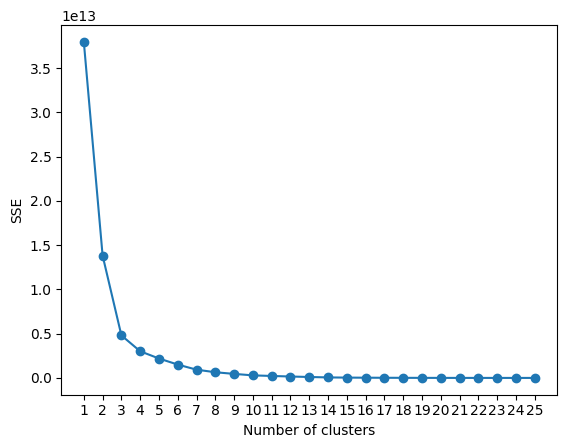

In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = []
for k in range(1, logistic.shape[0]+1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(logistic['총물류량'].values.reshape(-1, 1))
    sse.append(kmeans.inertia_)

# SSE 그래프 그리기
plt.plot(range(1, 26), sse, marker='o')
plt.xticks(range(1, 26))
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [11]:
kmeans3 = KMeans(n_clusters=3, random_state=42)
kmeans4 = KMeans(n_clusters=4, random_state=42)

In [12]:
res3 = kmeans3.fit_predict(logistic['총물류량'].values.reshape(-1, 1))
logistic['cluster3'] = res3

In [13]:
res4 = kmeans4.fit_predict(logistic['총물류량'].values.reshape(-1, 1))
logistic['cluster4'] = res4

In [14]:
mean_logistic_by_cluster3 = logistic.groupby('cluster3')['총물류량'].mean()
weights_cluster3 = mean_logistic_by_cluster3 / mean_logistic_by_cluster3.sum()
weights_cluster3 = weights_cluster3.tolist()

mean_logistic_by_cluster4 = logistic.groupby('cluster4')['총물류량'].mean()
weights_cluster4 = mean_logistic_by_cluster4 / mean_logistic_by_cluster4.sum()
weights_cluster4 = weights_cluster4.tolist()

print(weights_cluster3, weights_cluster4)

[0.30279253238627024, 0.5016070864929516, 0.1956003811207782] [0.2581068117587574, 0.13959353143844644, 0.3961802615781018, 0.20611939522469436]


In [15]:
logistic['cluster3'].value_counts()

0    13
2     9
1     3
Name: cluster3, dtype: int64

In [16]:
logistic['cluster4'].value_counts()

3    9
0    7
1    6
2    3
Name: cluster4, dtype: int64

In [17]:
weights_list_cluster3 = [weights_cluster3[1]] * 3 + [weights_cluster3[0]] * 13 +\
                [weights_cluster3[2]] * 9
weights_list_cluster3 = pd.Series(weights_list_cluster3)

weights_list_cluster4 = [weights_cluster4[2]] * 3 + [weights_cluster4[0]] * 7 +\
                [weights_cluster4[3]] * 9 + [weights_cluster4[1]] * 6
weights_list_cluster4 = pd.Series(weights_list_cluster4)

In [18]:
logistic['cluster3_가중치'] = weights_list_cluster3
logistic['cluster4_가중치'] = weights_list_cluster4

logistic

,구분,총물류량,가중치,방법1_가중치_물류량,cluster3,cluster4,cluster3_가중치,cluster4_가중치
0,강남구,6863990,0.077044,528831.095527,1,2,0.501607,0.396180
1,송파구,6243926,0.070084,437601.895443,1,2,0.501607,0.396180
2,강서구,5508522,0.061830,340591.555658,1,2,0.501607,0.396180
3,서초구,4642785,0.052113,241947.336217,0,0,0.302793,0.258107
4,관악구,4330620,0.048609,210505.697192,0,0,0.302793,0.258107
5,노원구,4010666,0.045017,180549.667255,0,0,0.302793,0.258107
6,마포구,4001825,0.044918,179754.547315,0,0,0.302793,0.258107
7,영등포구,3820924,0.042888,163870.394264,0,0,0.302793,0.258107
8,강동구,3776174,0.042385,160054.428514,0,0,0.302793,0.258107
9,성북구,3716587,0.041717,155043.051226,0,0,0.302793,0.258107


In [19]:
logistic['방법2_cluster3_가중치_물류량'] = logistic['총물류량'] *\
    logistic['cluster3_가중치']
logistic['방법2_cluster4_가중치_물류량'] = logistic['총물류량'] *\
    logistic['cluster4_가중치']

In [20]:
logistic

,구분,총물류량,가중치,방법1_가중치_물류량,cluster3,cluster4,cluster3_가중치,cluster4_가중치,방법2_cluster3_가중치_물류량,방법2_cluster4_가중치_물류량
0,강남구,6863990,0.077044,528831.095527,1,2,0.501607,0.396180,3443026.025617,2719377.353669
1,송파구,6243926,0.070084,437601.895443,1,2,0.501607,0.396180,3131997.529138,2473720.235954
2,강서구,5508522,0.061830,340591.555658,1,2,0.501607,0.396180,2763113.671302,2182367.686869
3,서초구,4642785,0.052113,241947.336217,0,0,0.302793,0.258107,1405800.627475,1198334.434031
4,관악구,4330620,0.048609,210505.697192,0,0,0.302793,0.258107,1311279.396603,1117762.521139
5,노원구,4010666,0.045017,180549.667255,0,0,0.302793,0.258107,1214399.714696,1035180.214289
6,마포구,4001825,0.044918,179754.547315,0,0,0.302793,0.258107,1211722.725917,1032898.291966
7,영등포구,3820924,0.042888,163870.394264,0,0,0.302793,0.258107,1156947.254015,986206.511613
8,강동구,3776174,0.042385,160054.428514,0,0,0.302793,0.258107,1143397.288191,974656.231786
9,성북구,3716587,0.041717,155043.051226,0,0,0.302793,0.258107,1125354.789564,959276.421194


In [21]:
res = logistic[['구분', '방법1_가중치_물류량', '방법2_cluster3_가중치_물류량', '방법2_cluster4_가중치_물류량']]
res

,구분,방법1_가중치_물류량,방법2_cluster3_가중치_물류량,방법2_cluster4_가중치_물류량
0,강남구,528831.095527,3443026.025617,2719377.353669
1,송파구,437601.895443,3131997.529138,2473720.235954
2,강서구,340591.555658,2763113.671302,2182367.686869
3,서초구,241947.336217,1405800.627475,1198334.434031
4,관악구,210505.697192,1311279.396603,1117762.521139
5,노원구,180549.667255,1214399.714696,1035180.214289
6,마포구,179754.547315,1211722.725917,1032898.291966
7,영등포구,163870.394264,1156947.254015,986206.511613
8,강동구,160054.428514,1143397.288191,974656.231786
9,성북구,155043.051226,1125354.789564,959276.421194


In [24]:
%cd /content/drive/MyDrive/공모전/KTH/data/전처리후/물류량
!ls -l

/content/drive/MyDrive/공모전/KTH/data/전처리후/물류량
total 9
-rw------- 1 root root 9027 Jun 27 08:44 지하철역정보.csv


In [26]:
res.to_csv('물류량_가중치.csv', encoding='utf-8', index=False)